#**Sparse AutoEncoders**

In the previous step, the input layer was constrainedby by the size of the hidden layer (128). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer. The code below outlines how this works. In particular, look at the line in the code that specifies the regularization:

> "activity_regularizer=regularizers.l1(10e-5)"

Remember L1 regularization constraints the cost function with and absolute value of the magnitude of the weights

>$\lambda \sum_{j=1}^p\lvert \beta_j \rvert$ where $p$ is the number of weights

L1 regularization shrinks the less important feature’s coefficient to zero thus, removing some feature altogether.

In the following example we use the  ["binary_crossentropy"](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) loss or cost function. This term effectively tries to maximise the Log-loss function and is very similar to the entropy calculations we did when attempting to discretize a continous variable. In this approach we are trying to match pixels rather than match the intensity of them which the "mean_squared_error" does.


Now when you print how out the hidden feature set you will notice that a number of them are zero. This means we have introduced sparsity into the autoencoder.

Have a go at changing the loss function and changing the optimizers in the following code. See how your results change.

Share your thoughts on the comment box.



(60000, 784)
(10000, 784)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


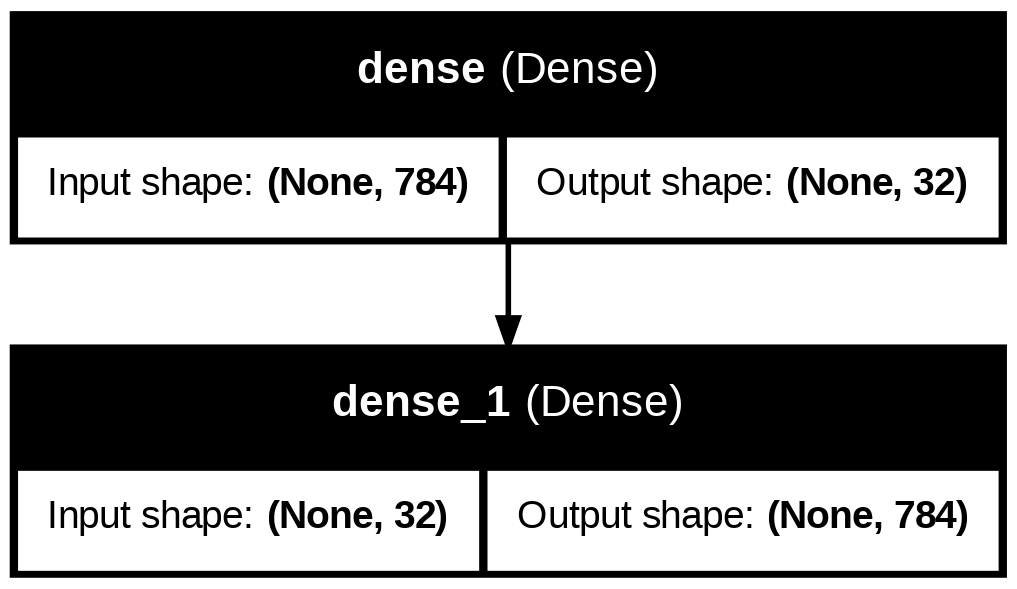

In [2]:
import tensorflow as tf
from tensorflow import keras


#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#from keras.utils import plot_model
#from keras import regularizers
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

img_rows, img_cols = 28, 28

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

#,activity_regularizer=regularizers.l1(10e-5)

model = keras.Sequential()
model.add(keras.layers.Dense(32,activation='relu',activity_regularizer=keras.regularizers.l1(10e-5),input_dim=784))
model.add(keras.layers.Dense(784,activation='sigmoid'))
#loss_choice='mean_squared_error'
loss_choice='binary_crossentropy'
#model.compile(optimizer='adadelta', loss=loss_choice,metrics = ['accuracy'])
model.compile(loss=loss_choice,
              optimizer='adam',
              metrics = ['accuracy'])

keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [3]:
#print(x_train.shape)

history=model.fit(x_train,x_train,verbose=1,epochs=50,batch_size=256,shuffle=True,)
model.save('auto_en.h5')


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0119 - loss: 0.6833
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0155 - loss: 0.5988
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0149 - loss: 0.5399
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0154 - loss: 0.4925
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0151 - loss: 0.4547
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0146 - loss: 0.4240
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0153 - loss: 0.3988
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0143 - loss: 0.3788
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0139 - loss: 0.3615
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0141 - loss: 0.3474
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0152 - loss: 0.3358
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

We have now trianed our algorithm and I want to find the new decompressed variables. I have used an alternative piece of code to that shown previously. In it we basically create a new neural network model by mimicing the original neural network up to the hidden layer. We then insert the weights from the original model. We then use the new_model predictions to get outputs.

In [4]:
model.layers[0].get_weights()[0][1]

array([ 0.06075501, -0.08516861, -0.06890041, -0.05796972, -0.02287152,
        0.02504969, -0.02979298, -0.00136645,  0.03221204, -0.01555169,
       -0.04640714,  0.00942471, -0.07252085,  0.04162354,  0.0464033 ,
        0.02437501, -0.03683765, -0.07307418, -0.07256745,  0.01326444,
        0.02792384,  0.03340235,  0.06885067,  0.04810182,  0.05429352,
       -0.00656511, -0.04495374, -0.02774236,  0.00315496,  0.00368413,
        0.0161408 ,  0.07220419], dtype=float32)

In [8]:
new_model = keras.Sequential()
new_model.add(keras.layers.Dense(32,activation='relu',activity_regularizer=keras.regularizers.l1(10e-5),input_dim=784))
new_model.set_weights(model.layers[0].get_weights())
new_model.compile(optimizer='adam', loss='categorical_crossentropy')
output = new_model.predict(x_train)
print(output)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
predicted_image = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


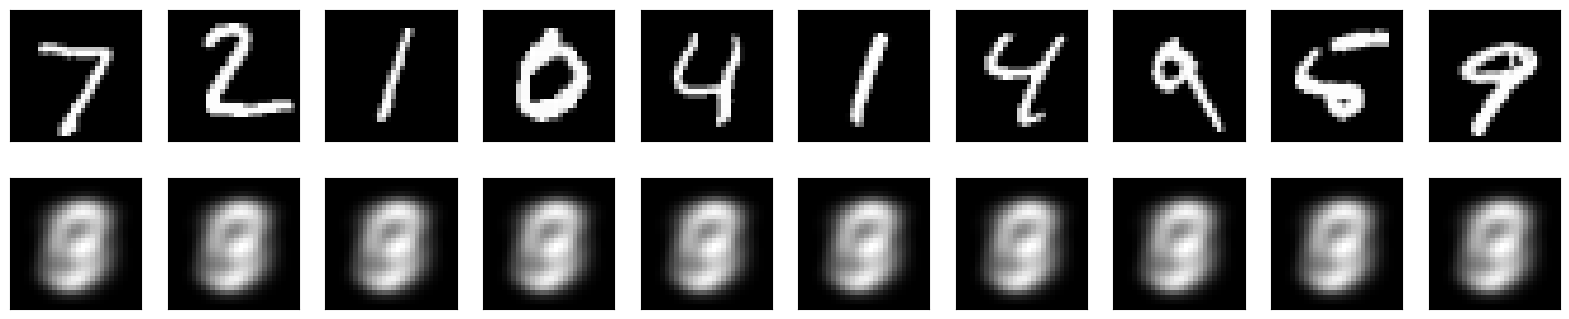

In [7]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
import matplotlib.pyplot as plt





# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined